In [1]:
!pip config set global.index-url https://mirrors.aliyun.com/pypi/simple/
!python -m pip install -U pip
!pip -V
!pip install sklearn pandas

Writing to /root/.config/pip/pip.conf
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)
pip 20.2.4 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [3]:
print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.5
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_train_all = x_train_all / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [5]:
# x = (x - u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [6]:
# tf.keras.Sequential()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3]
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[]
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [7]:
history = model.fit(x_train_scaled, y_train, epochs=10, 
                    validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.5311 - accuracy: 0.8114 - val_loss: 0.4065 - val_accuracy: 0.8602
Epoch 2/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3892 - accuracy: 0.8588 - val_loss: 0.3598 - val_accuracy: 0.8712
Epoch 3/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3504 - accuracy: 0.8740 - val_loss: 0.3441 - val_accuracy: 0.8812
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3257 - accuracy: 0.8812 - val_loss: 0.3289 - val_accuracy: 0.8838
Epoch 5/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3069 - accuracy: 0.8879 - val_loss: 0.3462 - val_accuracy: 0.8754
Epoch 6/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2912 - accuracy: 0.8930 - val_loss: 0.3286 - val_accuracy: 0.8822
Epoch 7/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2773 - accuracy: 0.8989 - val_loss: 0.3105 -

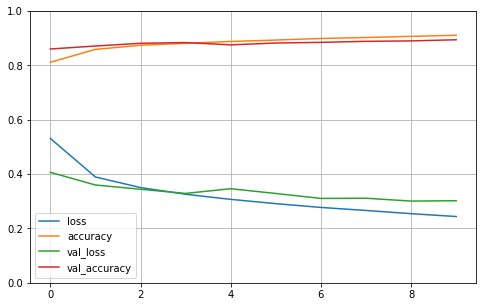

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [9]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.3332 - accuracy: 0.8813


[0.33315831422805786, 0.8812999725341797]

In [10]:
tf.saved_model.save(model, './keras_saved_graph')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./keras_saved_graph/assets


In [11]:
!saved_model_cli show --dir ./keras_saved_graph --all

2020-11-02 09:59:58.480023: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1

MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['flatten_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28)
        name: serving_default_flatten_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_2'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: ten

In [12]:
!saved_model_cli show --dir ./keras_saved_graph --tag_set serve \
    --signature_def serving_default

2020-11-02 10:00:13.227271: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
The given SavedModel SignatureDef contains the following input(s):
  inputs['flatten_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 28, 28)
      name: serving_default_flatten_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_2'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 10)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


In [14]:
!saved_model_cli run --dir ./keras_saved_graph --tag_set serve \
    --signature_def serving_default \
    --input_exprs 'flatten_input=np.ones((2,28,28))'

2020-11-02 10:02:50.755485: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-02 10:02:51.703402: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-02 10:02:51.730653: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:968] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2020-11-02 10:02:51.731001: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 SUPER computeCapability: 7.5
coreClock: 1.83GHz coreCount: 48 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 462.00GiB/s
2020-11-02 10:02:51.731045: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-11-02 10:02:51.732100: I tensorflow/stream_executo

In [15]:
loaded_saved_model = tf.saved_model.load('./keras_saved_graph')
print(list(loaded_saved_model.signatures.keys()))

['serving_default']


In [17]:
inference = loaded_saved_model.signatures['serving_default']
print(inference)

<ConcreteFunction signature_wrapper(flatten_input) at 0x7FEEC700E908>


In [18]:
print(inference.structured_outputs)

{'dense_2': TensorSpec(shape=(None, 10), dtype=tf.float32, name='dense_2')}


In [20]:
results = inference(tf.constant(x_test_scaled[:1]))
print(results['dense_2'])

tf.Tensor(
[[1.38578453e-05 9.27837505e-08 8.89398621e-07 6.41913948e-06
  2.38131543e-05 1.52430935e-02 1.76264064e-06 1.83133818e-02
  5.90262134e-05 9.66337740e-01]], shape=(1, 10), dtype=float32)
